In [127]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)

#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

In [96]:
df = pd.read_csv('/content/wisc_bc_data.csv', encoding='utf-8')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [97]:
df.info()#타켓   diagnosis:질병지수 B:암, N:암이아님

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [98]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [99]:
df2 = df.drop('diagnosis', axis=1)
df2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [100]:
df.shape

(569, 32)

In [101]:
df2.shape

(569, 31)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
                    df2,#문제 ()
                df.iloc[:,1],#정답
                test_size=0.2,
                random_state=30
)
#문제 이렇게 써도 됨
#df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
#       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
#       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
#       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
#       'area_worst', 'smoothness_worst', 'compactness_worst',
#       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']]

In [103]:
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [104]:
y_train.shape

(455,)

In [105]:
y_test.shape

(114,)

In [106]:
y_train[:10]

392    B
150    B
117    M
38     M
319    B
228    M
8      B
534    M
452    M
76     M
Name: diagnosis, dtype: object

In [107]:
## 단일 모델들에 대한 객체를 생성
## voting(hard/soft)

In [108]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    max_features = 8,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=8, random_state=100)

In [109]:
svc = SVC(
    C=0.1,
    gamma=0.003,#곡선의 휘어진 정도
    kernel='rbf',#직선,곡선 중 택1 각각의 하이퍼파라메터가 다르다.rbf=곡선,linear=직선
    probability=True,#각 라벨링 값으로 될 가능성 구해주세요!퍼센트 제공
    random_state = 100
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=0.003, probability=True, random_state=100)

In [110]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [111]:
dt_predt = dt.predict(X_test)

In [112]:
svc_predt = svc.predict(X_test)

In [113]:
lr_predt = lr.predict(X_test)

In [114]:
dt_acc = accuracy_score(y_test, dt_predt)
svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc, svc_acc, lr_acc

(0.9122807017543859, 0.6403508771929824, 0.6403508771929824)

In [115]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='hard'
)
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.6403508771929824

In [116]:
## 소프트 보팅
voting_clf2 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='soft'
)
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9122807017543859

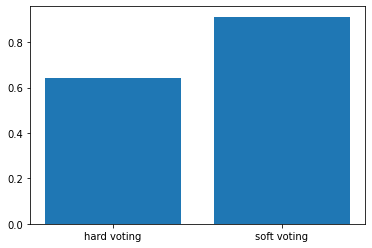

In [117]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(2)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)
            ])
plt.xticks(x, ['hard voting','soft voting']);

In [118]:
## 소프트보팅이 하드보팅보다 정확도가 높아서 많이 쓰임.

In [119]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [120]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.956140350877193

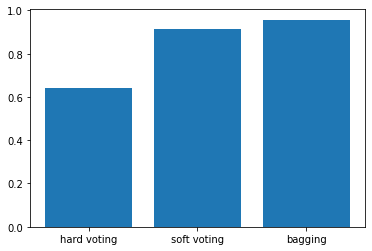

In [121]:
x = np.arange(3)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt)
            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [122]:
confusion_matrix(y_test, soft_voting_predicted)
##b:양성 m:악성
##정상 73명중 67정상 6명 암환자.
##암환자 40명 중 4명 정상, 37암환자
##4명을 정상으로 판단했는데 recall(재현율)이 bagging과 같음

array([[67,  6],
       [ 4, 37]])

In [123]:
confusion_matrix(y_test, rf_predt)
##정상 73정상암환자 1명은 암환자
## 암환자 40명 중 4명 정상인으로 판단
##recall(재현율)이 softvoting보다는 높음.
##softvoting model과  bagging과 같음

array([[72,  1],
       [ 4, 37]])

In [124]:
confusion_matrix(y_test, svc_predt)#틀린 것을 찾아내지 못하므로 쓰기에 좋지 않다.

array([[73,  0],
       [41,  0]])

In [124]:
#from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier
## tree가 다 100개씩

In [138]:
gbc = GradientBoostingClassifier(
     random_state=42
).fit(X_train, y_train)

In [141]:
hist = HistGradientBoostingClassifier(
     random_state=42
).fit(X_train, y_train)

In [139]:
xgb = XGBClassifier(
     random_state=42,
     tree_method='hist'
).fit(X_train, y_train)

In [137]:
lgbm = LGBMClassifier(
     random_state=42
).fit(X_train, y_train)

In [140]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.956140350877193

In [142]:
hist_predicted = hist.predict(X_test)
accuracy_score(y_test, hist_predicted)

0.9473684210526315

In [143]:
xgb_predicted = xgb.predict(X_test)
accuracy_score(y_test, xgb_predicted)

0.9649122807017544

In [144]:
lgbm_predicted = lgbm.predict(X_test)
accuracy_score(y_test, lgbm_predicted)

0.9385964912280702

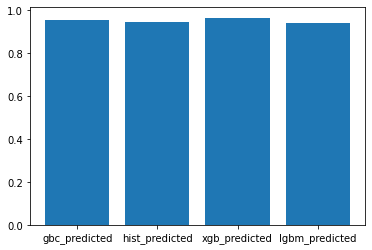

In [146]:
x = np.arange(4)
plt.bar(x, height= [
                    accuracy_score(y_test, gbc_predicted),
                    accuracy_score(y_test, hist_predicted),
                    accuracy_score(y_test, xgb_predicted),
                    accuracy_score(y_test, lgbm_predicted)
            ])
plt.xticks(x, ['gbc_predicted','hist_predicted', 'xgb_predicted','lgbm_predicted']);

In [147]:
confusion_matrix(y_test, xgb_predicted)
#정상인 73명 중 1명을 암환자로 판단
#암환자 41명 중 3명을 정상환자로 판단
#재현율이 높은 편이므로, xgboost모델 선정이 좋다.

array([[72,  1],
       [ 3, 38]])